## Kütüphaneleri Yüklüyoruz

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

## Veri Setini Yüklüyoruz

In [23]:
# breast-cancer-wisconsin verisetini yükleyelim
dataset = load_dataset("scikit-learn/breast-cancer-wisconsin")
df = dataset["train"].to_pandas()

# Pandas ayarlarını yaparak tüm sütunların görünmesini sağlıyoruz
pd.set_option('display.max_columns', None)

# İlk 5 satıra bakalım
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


## Boş değerleri kontrol edelim

In [24]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [25]:
# 'Unnamed: 32' sütununu ve 'id' sütununu kaldırıyoruz
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [26]:
# 'diagnosis' sütununu sayısal değerlere dönüştürüyoruz
df["diagnosis"] = df["diagnosis"].map({"M": 0, "B": 1})

## # Özellik ve hedef değişken

In [27]:
X = df.drop(columns=['diagnosis'])
y = df["diagnosis"]

## # Veriyi eğitim ve test setlerine bölelim

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## # Özellikleri ölçeklendirelim

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Derin öğrenme modelini oluşturuyoruz

In [32]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [33]:
model = Sequential()

# İlk katman: Girdi katmanı (input layer) ve gizli katman (hidden layer)
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Diğer gizli katman
model.add(Dense(32, activation='relu'))

# Çıktı katmanı (output layer)
model.add(Dense(1, activation='sigmoid'))  # Binary sınıflandırma (0 ve 1)

# Modeli derliyoruz
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitiyoruz
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# Modelin performansını değerlendiriyoruz
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

Epoch 1/50


C:\Users\90535\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6561 - loss: 0.6073 - val_accuracy: 0.9532 - val_loss: 0.3432
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9408 - loss: 0.3164 - val_accuracy: 0.9474 - val_loss: 0.1961
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9470 - loss: 0.1884 - val_accuracy: 0.9591 - val_loss: 0.1391
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9672 - loss: 0.1387 - val_accuracy: 0.9649 - val_loss: 0.1080
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9634 - loss: 0.1303 - val_accuracy: 0.9649 - val_loss: 0.0903
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9711 - loss: 0.0946 - val_accuracy: 0.9766 - val_loss: 0.0795
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9826 - loss: 0.0836 - val_accuracy: 0.9766 - val_loss: 0.0720
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9733 - loss: 0.0930 - val_accuracy: 0.9883 - val_loss: 0.0658
Epo

# Sonuçları yazdırıyoruz

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [35]:
print("Doğruluk (Accuracy):", accuracy_score(y_test, y_pred))

Doğruluk (Accuracy): 0.9766081871345029


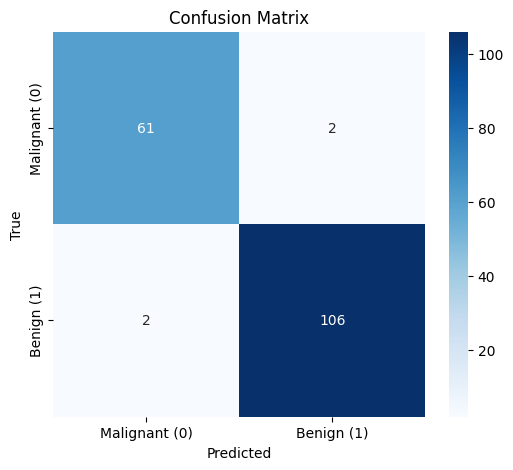

In [36]:
# Confusion matrix'i hesaplayalım ve görselleştirelim
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix'i ısı haritası (heatmap) olarak görselleştiriyoruz
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant (0)', 'Benign (1)'], yticklabels=['Malignant (0)', 'Benign (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [37]:
cm

array([[ 61,   2],
       [  2, 106]], dtype=int64)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step


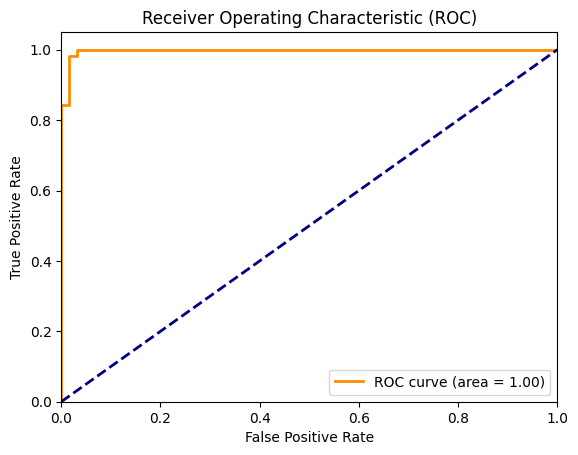

In [38]:
# ROC Eğrisini çiziyoruz
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test_scaled))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [39]:
roc_auc

0.9972075249853027

In [40]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, model.predict(X_test_scaled))
print(f"Log Loss: {logloss}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step
Log Loss: 0.0527136534609423


In [41]:
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

